In [1]:
import pandas as pd
import numpy as np
import glob
import os
import csv
import sys
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm
from scipy.stats import linregress

sns.set_style('darkgrid')

%matplotlib inline
import matplotlib.pyplot as plt

#setting pandas display options
pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000
pd.set_option('display.max_colwidth', -1)  # or 199

BASE_DIR = "/Users/karinalopez/Desktop/ds4a/"

In [2]:
# remove outliers in dataset
def recode_outliers(df):
    
    # recode outliers using IQR method
    stdev_dict_lower = {}
    stdev_dict_upper = {}
    
    # list of column names you want to remove outliers in
    cols = [ 'county_total_loan_amount', 'q1', 'q2', 'q_dif']
    
    for col in cols:
        Q1 = df[col].quantile(.25)
        Q3 = df[col].quantile(.75)
        IQR = Q3-Q1
        
        stdev_dict_lower[col] = Q1 - 1.5 * IQR
        stdev_dict_upper[col] = Q3 + 1.5 * IQR
    
    for col in cols:
        df[col] = df[col].clip(lower = stdev_dict_lower[col], upper = stdev_dict_upper[col])

    
    return(df)


In [3]:
# Function to create figure plots

def gen_reg_plot(df, xcol, ycol, xlab, ylab, fname):

    os.chdir(BASE_DIR + "team95/figures/exploratory/")

    plot = sns.jointplot(x = xcol, y = ycol, data = df, y_jitter = 0.1, kind = "reg", scatter_kws = {'alpha':0.30});

    # Set the labels
    plot.set_axis_labels(xlab, ylab, fontsize = 12)
    plot.fig.tight_layout()
    plot.fig.subplots_adjust(top = 0.92)
    
    # Set axes
    plot.ax_marg_x.set_xlim((df[xcol].min() - 0.2), (df[xcol].max()+0.2))
    plot.ax_marg_y.set_ylim((df[ycol].min() - 0.2), (df[ycol].max()+0.2))


    # Save your figure
    plot.savefig('regression_' + fname + '.png')
    
    stats = linregress(df[xcol], df[ycol])
    print('slope = ' + str(round(stats.slope, 3)))
    print('intercept = ' + str(round(stats.intercept, 3)))
    print('r = ' + str(round(stats.rvalue, 3)))
    print('pvalue = ' + str(round(stats.pvalue, 3)))
    print('stdev = ' + str(round(stats.stderr, 3)))

    return()






In [4]:
os.chdir(BASE_DIR + 'team95/data-sets/intermediate-datasets/')

# Load in your datasets
df = pd.read_csv('final_combined_df.csv')

os.chdir(BASE_DIR + 'team95/data-sets/clean-datasets/')
pop_df = pd.read_csv('ca_county_population.csv')


In [5]:
# Merge large dataset w/ population info
df = pd.merge(df, pop_df, how = 'outer')


In [6]:
# drop unnecessary column
df = df.drop(columns = 'Unnamed: 0')
df.columns

Index(['ppp_loan_amount', 'business_name', 'address', 'city', 'state',
       'zipcode', 'naics_code', 'business_type', 'jobs_reported',
       'date_approved', 'lender', 'cd', 'industry_title', 'two_digit_code',
       'general_industry_title', 'thousands_of_jobs_2019', 'zipcode_type',
       'county', 'county_total_loan_amount', 'q1', 'q2', 'q_dif', 'date',
       'fips', 'cases_apr10', 'deaths_apr10', 'GEOID', 'total_population',
       'urban_population', 'rural_population', 'rural_percent'],
      dtype='object')

In [7]:
print(df.shape)
df.head(n = 4)

(456789, 31)


,ppp_loan_amount,business_name,address,city,state,zipcode,naics_code,business_type,jobs_reported,date_approved,lender,cd,industry_title,two_digit_code,general_industry_title,thousands_of_jobs_2019,zipcode_type,county,county_total_loan_amount,q1,q2,q_dif,date,fips,cases_apr10,deaths_apr10,GEOID,total_population,urban_population,rural_population,rural_percent
0,10000000,ito incorporated,431 isis ave,inglewood,ca,90301,722310,subchapter s corporation,500,2020-04-09,city national bank,ca-43,food service contractors,72,leisure and hospitality,16575.9,non-unique,los angeles,18670084713,103484958447,88778057202,-14706901245,2020-04-10,6037,8430,241,6037,9818605,9759181,59424,0.6
1,122194,sweet_&_chilli_llc,440 hindry ave unit h,inglewood,ca,90301,722511,limited liability company(llc),7,2020-06-16,"bsd capital, llc dba lendistry",ca-43,full-service restaurants,72,leisure and hospitality,16575.9,non-unique,los angeles,18670084713,103484958447,88778057202,-14706901245,2020-04-10,6037,8430,241,6037,9818605,9759181,59424,0.6
2,101041,decadent cuising kitchen,936 w manchester blvd unit b,inglewood,ca,90301,722511,sole proprietorship,6,2020-08-06,"bank of america, national association",ca-43,full-service restaurants,72,leisure and hospitality,16575.9,non-unique,los angeles,18670084713,103484958447,88778057202,-14706901245,2020-04-10,6037,8430,241,6037,9818605,9759181,59424,0.6
3,87210,el puerto escondido inc,915 arbor vitae,inglewood,ca,90301,722511,corporation,0,2020-05-02,"wells fargo bank, national association",ca-43,full-service restaurants,72,leisure and hospitality,16575.9,non-unique,los angeles,18670084713,103484958447,88778057202,-14706901245,2020-04-10,6037,8430,241,6037,9818605,9759181,59424,0.6


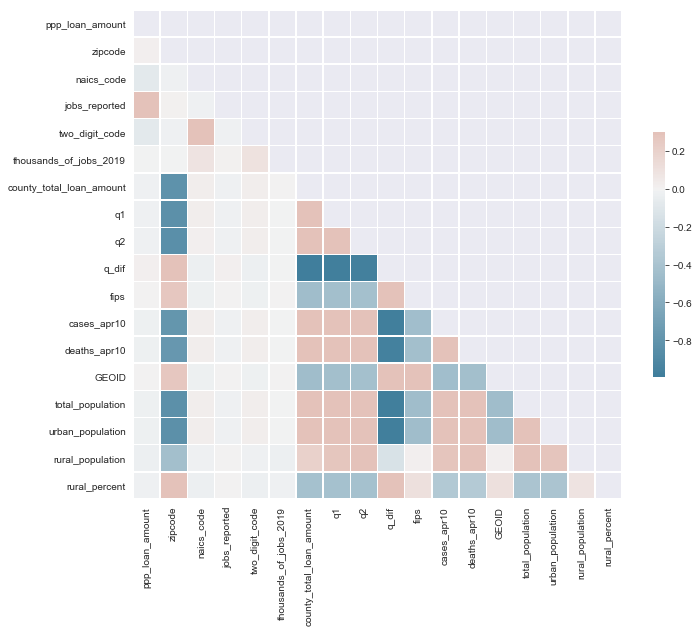

In [8]:
# Take a quick look at the correlation matrix
corr = df.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

For some background, quarter 1 (q1) and quarter 2 (q2) contain the sum of tax transactions in each county. Each quarter is comprised of three months, where Quarter 1 begins on January-end of March 2020 and quarter 2 begins in April-end of June 2020. These two columns coincide with the time before covid and the time post-covid, approximately when ppp loans were being distributed.

From the above figure, that there are aren't any strong positive correlations across any of the columns. We can find, however, that PPP county loan amounts is strongly negatively correlated with differences in tax transaction sales between quarter 1 and 2. 

Further, quarter 1 and quarter 2 transaction tax sales are not strongly correlated with one another which may indicate that there is an outside influence impacting sales. However, we should consider looking at the trend of tax sales of the past 5 years for each quarter to see if this pattern is trypical across these two quarters.

Additionally, to account for population density, calculate the loan amount and tax transaction sales distribution per capita.


In [9]:
county_df = df[['county', 'county_total_loan_amount', 'q1', 'q2', 'q_dif', 'total_population',
       'urban_population', 'rural_population', 'rural_percent']]



In [10]:
county_df = county_df.drop_duplicates()


In [11]:
# lets divide up by capita
county_df['ppp_per_capita'] = county_df['county_total_loan_amount']/county_df['total_population']
county_df['q1_per_capita'] = county_df['q1']/county_df['total_population']
county_df['q2_per_capita'] = county_df['q2']/county_df['total_population']
county_df['q_dif_per_capita'] = county_df['q_dif']/county_df['total_population']


In [12]:
county_df.describe()

,county_total_loan_amount,q1,q2,q_dif,total_population,urban_population,rural_population,rural_percent,ppp_per_capita,q1_per_capita,q2_per_capita,q_dif_per_capita
count,5.800000e+01,5.800000e+01,5.800000e+01,5.800000e+01,5.800000e+01,5.800000e+01,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000
mean,1.178001e+09,7.602377e+09,7.072882e+09,-5.294949e+08,6.423096e+05,6.098898e+05,32419.827586,28.693103,1452.410367,10440.475664,10554.410434,113.934769
std,2.773076e+09,1.578782e+10,1.381870e+10,2.224195e+09,1.416933e+06,1.408567e+06,26354.185170,28.886820,841.980167,3115.605054,2694.765147,1966.655724
min,5.823540e+05,1.258679e+07,9.786734e+06,-1.470690e+10,1.175000e+03,0.000000e+00,0.000000,0.000000,179.723444,3884.812654,3933.758025,-7208.605106
25%,4.881627e+07,3.800424e+08,4.554436e+08,-1.481634e+08,4.800075e+04,2.129575e+04,13819.000000,6.600000,838.987829,8201.210447,8985.359261,-485.446080
50%,2.662280e+08,2.025088e+09,1.986855e+09,4.578508e+07,1.791405e+05,1.402550e+05,25167.500000,16.050000,1319.537196,10704.747935,10463.529307,343.581939
75%,9.156123e+08,8.225666e+09,6.998039e+09,9.410020e+07,6.425928e+05,5.887798e+05,41606.500000,44.425000,1895.620053,12371.901192,12077.252451,1120.114721
max,1.867008e+10,1.034850e+11,8.877806e+10,1.768905e+09,9.818605e+06,9.759181e+06,102054.000000,100.000000,3991.779895,18346.974807,17793.184291,4000.428132


# Relationships by raw numbers

In [13]:
# Remove the following counties since they were missing data in their tax data info

list_counties = ['alpine', 'sierra', 'modoc', 'del norte', 'lassen']

county_df = county_df[~county_df['county'].isin(list_counties)]


In [14]:
county_df.shape

(53, 13)

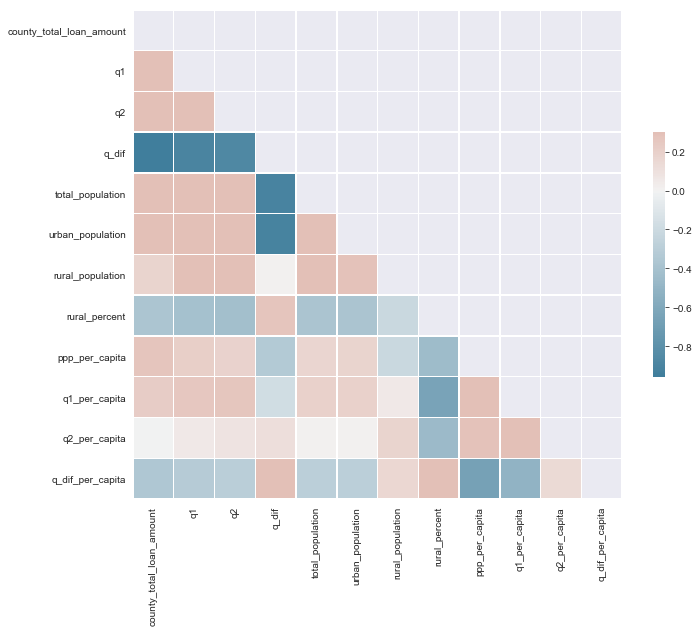

In [15]:
corr = county_df.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

slope = 0.173
intercept = -149437601.052
r = 0.983
pvalue = 0.0
stdev = 0.005


()

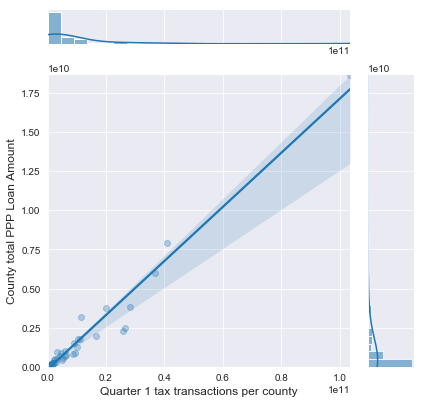

In [16]:
gen_reg_plot(county_df, 'q1', 'county_total_loan_amount', 'Quarter 1 tax transactions per county', 'County total PPP Loan Amount', 'Q1xCountyLoan')




Although we see that there is a strong correlation between County total PPP loan amount and quartet 1 tax transactions per county, the distribution for each of these axes are not normal. It would probably be more informative if we plotted this relationship across population density.

slope = 0.195
intercept = -219932509.892
r = 0.969
pvalue = 0.0
stdev = 0.007


()

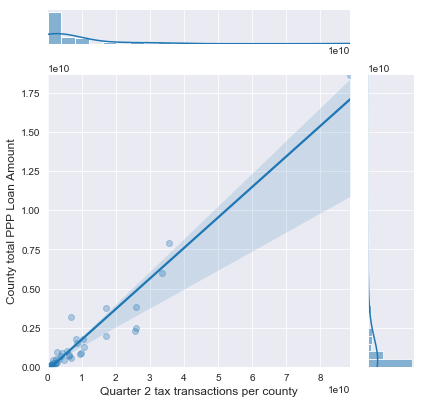

In [17]:
gen_reg_plot(county_df, 'q2', 'county_total_loan_amount', 'Quarter 2 tax transactions per county', 'County total PPP Loan Amount', 'Q2xCountyLoan')





slope = -1.186
intercept = 599411249.251
r = -0.957
pvalue = 0.0
stdev = 0.05


()

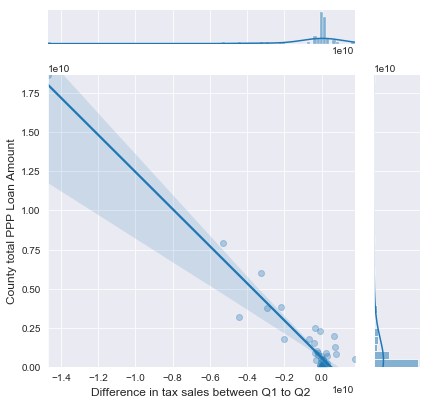

In [18]:
gen_reg_plot(county_df, 'q_dif', 'county_total_loan_amount', 'Difference in tax sales between Q1 to Q2', 'County total PPP Loan Amount', 'Q_difxCountyLoan')






slope = -42589253.243
intercept = 2325247980.254
r = -0.372
pvalue = 0.006
stdev = 14858287.575


()

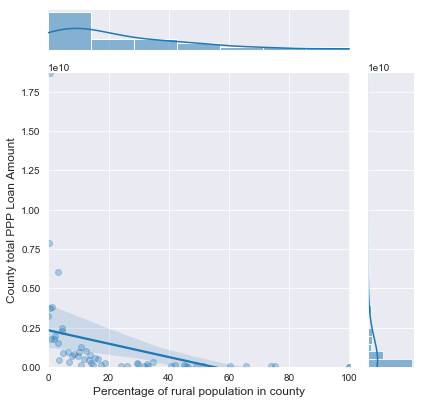

In [19]:
gen_reg_plot(county_df, 'rural_percent', 'county_total_loan_amount', 'Percentage of rural population in county', 'County total PPP Loan Amount', 'Rural_percxCountyLoan')


# Relationships by capita

slope = -14.607
intercept = 1898.677
r = -0.446
pvalue = 0.001
stdev = 4.104


()

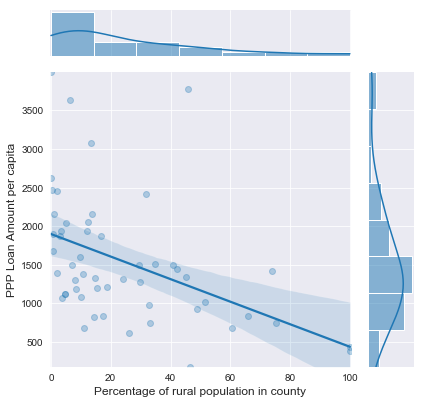

In [20]:
gen_reg_plot(county_df, 'rural_percent', 'ppp_per_capita', 'Percentage of rural population in county', 'PPP Loan Amount per capita', 'Rural_percxPPPloan_per_capita')





slope = 0.0
intercept = 1454.342
r = 0.212
pvalue = 0.128
stdev = 0.0


()

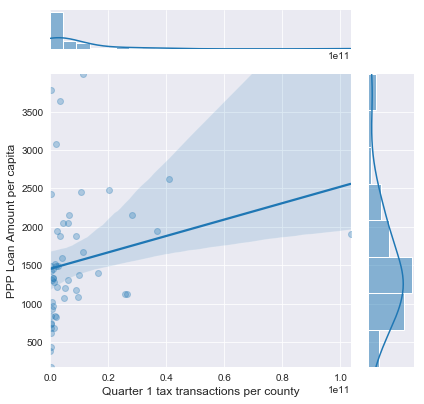

In [21]:
gen_reg_plot(county_df, 'q1', 'ppp_per_capita', 'Quarter 1 tax transactions per county', 'PPP Loan Amount per capita', 'Q1_per_capitacxPPP_per_capita')






slope = 0.0
intercept = 1459.01
r = 0.188
pvalue = 0.177
stdev = 0.0


()

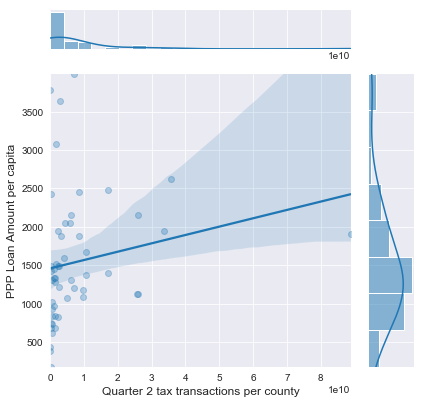

In [22]:
gen_reg_plot(county_df, 'q2', 'ppp_per_capita', 'Quarter 2 tax transactions per county', 'PPP Loan Amount per capita', 'Q2_per_capitacxPPP_per_capita')







slope = -0.0
intercept = 1474.886
r = -0.331
pvalue = 0.016
stdev = 0.0


()

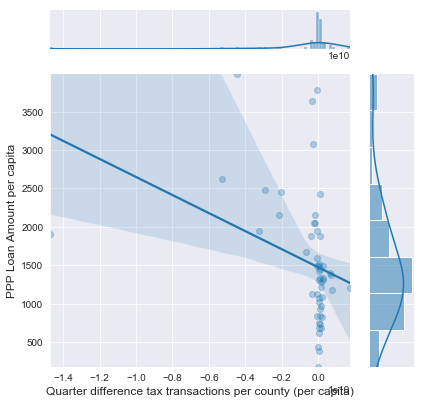

In [23]:
gen_reg_plot(county_df, 'q_dif', 'ppp_per_capita', 'Quarter difference tax transactions per county (per capita)', 'PPP Loan Amount per capita', 'Q_dif_per_capitacxPPP_per_capita')





slope = 0.196
intercept = -559.809
r = 0.666
pvalue = 0.0
stdev = 0.031


()

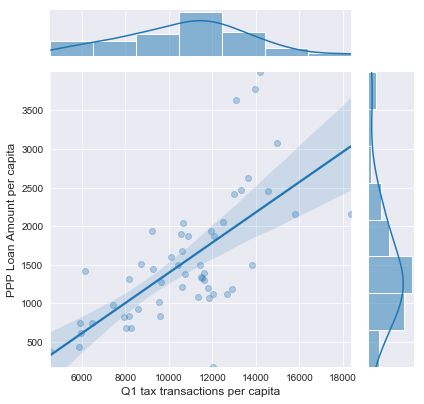

In [24]:
gen_reg_plot(county_df, 'q1_per_capita', 'ppp_per_capita', 'Q1 tax transactions per capita', 'PPP Loan Amount per capita', 'Q1_per_capitacxPPP_per_capita')




When looking at PPP loans and tax transactions by capita, both distributions look more normal. Looking at Q1 transaction per capita x PPP loan amount per capita, there is a positive correlation that is significant, although it's not as strong as when it's the raw numbers. 

When looking at the same relationship but with quarter 2 transaction tax sales, the correlation is less strong although still significant. This would indicate that PPP loans administered to each county were strongly correlated w/ county tax transactions before COVID. This may indicate that PPP loans were more largely distributed to areas with more wealth. To explore this further, we can take a look at which industries received higher amounts of ppp loans.


slope = 0.097
intercept = 475.487
r = 0.288
pvalue = 0.037
stdev = 0.045


()

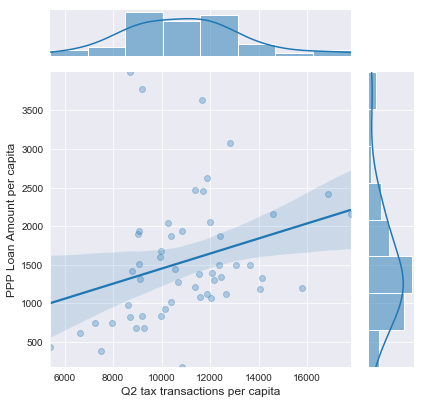

In [25]:
gen_reg_plot(county_df, 'q2_per_capita', 'ppp_per_capita', 'Q2 tax transactions per capita', 'PPP Loan Amount per capita', 'Q2_per_capitacxPPP_per_capita')



slope = -0.305
intercept = 1606.837
r = -0.657
pvalue = 0.0
stdev = 0.049


()

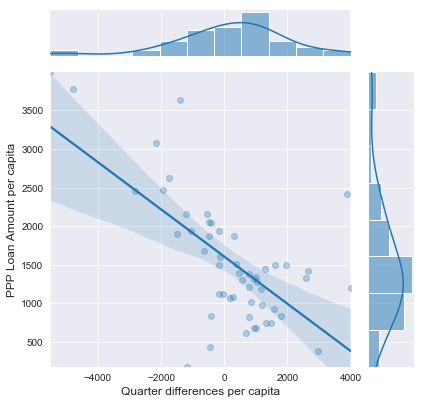

In [26]:
gen_reg_plot(county_df, 'q_dif_per_capita', 'ppp_per_capita', 'Quarter differences per capita', 'PPP Loan Amount per capita', 'Q_dif_per_capitacxPPP_per_capita')




slope = -14.607
intercept = 1898.677
r = -0.446
pvalue = 0.001
stdev = 4.104


()

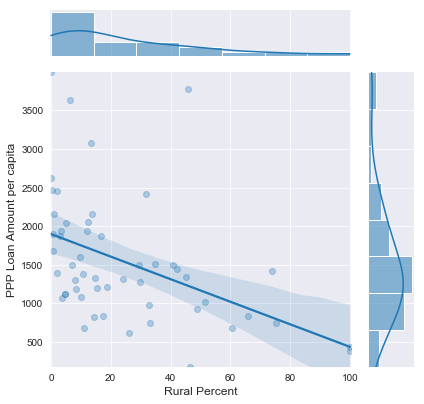

In [27]:
gen_reg_plot(county_df, 'rural_percent', 'ppp_per_capita', 'Rural Percent', 'PPP Loan Amount per capita', 'Rural_percxPPP_per_capita')





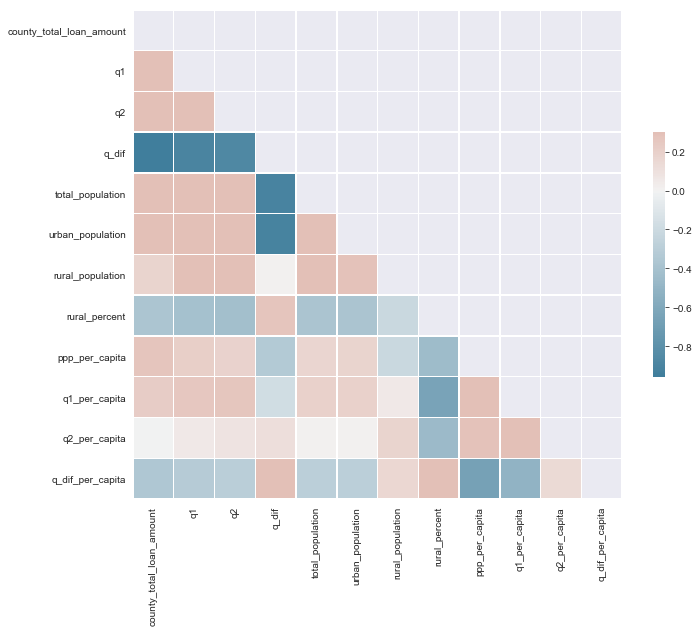

In [28]:
corr = county_df.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

slope = 0.872
intercept = 483714163.13
r = 0.998
pvalue = 0.0
stdev = 0.009


()

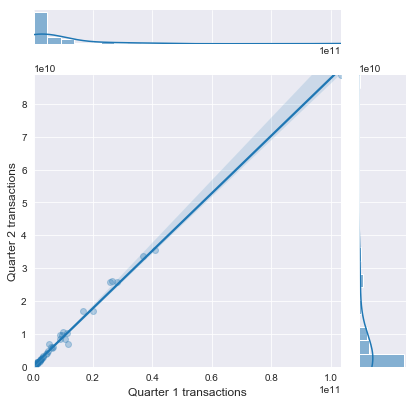

In [29]:
gen_reg_plot(county_df, 'q1', 'q2', 'Quarter 1 transactions', 'Quarter 2 transactions', 'Q1cxQ2')






slope = 0.676
intercept = 3684.563
r = 0.779
pvalue = 0.0
stdev = 0.076


()

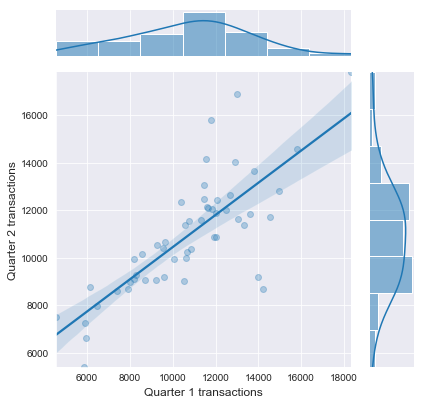

In [30]:
gen_reg_plot(county_df, 'q1_per_capita', 'q2_per_capita', 'Quarter 1 transactions', 'Quarter 2 transactions', 'Q1cxQ2')







# Checking county trnasaction history

In [72]:
# check the 5 year growth of tax transactions to see if there is an outside influence impacting sales
os.chdir(BASE_DIR + 'team95/data-sets/clean-datasets/')
year_5_df = pd.read_csv('tax_5year.csv')


In [106]:
temp_county_df = county_df.drop(columns = ['q1', 'q2'])


In [73]:
# Remove the following counties since they were missing data in their tax data info

list_counties = ['alpine', 'sierra', 'modoc', 'del norte', 'lassen']
year_5_df = year_5_df[~year_5_df['county'].isin(list_counties)]



In [74]:
#create new dataframe groupby county + quarter and sum tax_sales
grp_5yr_df = year_5_df.groupby(['county','quarter'])['tax_sales'].sum().unstack()
grp_5yr_df = grp_5yr_df.reset_index().rename_axis(None, 1)



In [75]:
grp_5yr_df.head(n = 5)

,county,a,q1,q2,q3,q4
0,alameda,4.321164e+11,1.175184e+11,1.253030e+11,1.102528e+11,1.163658e+11
1,amador,6.340579e+09,1.698359e+09,1.995316e+09,1.599202e+09,1.694807e+09
2,butte,4.636178e+10,1.281280e+10,1.445244e+10,1.172021e+10,1.220666e+10
3,calaveras,5.286035e+09,1.387098e+09,1.732540e+09,1.409836e+09,1.356777e+09
4,colusa,5.202057e+09,1.318219e+09,1.874405e+09,1.385161e+09,1.263736e+09


In [76]:
year_5_df.start_month.value_counts()

months = {1: 'January', 4: 'April', 10:'October', 7: 'July'}

year_5_df['start_month'] = year_5_df.start_month.map(months )



In [81]:
year_5_df['date'] = year_5_df['start_month'].astype(str) + '/' + year_5_df['year'].astype(str)


In [82]:
year_5_df.head(n = 2)

,Unnamed: 0,year,quarter,start_month,end_month,county,county_code,business_group_code,business_type,permit_date,num_permits,tax_sales,disclosure_flag,date
0,0,2020,q1,January,3,alameda,1,c01,motor vehicle and parts dealers,2020-03-31,1338.0,950362673.0,NaN,January/2020
1,1,2020,q2,April,6,alameda,1,c01,motor vehicle and parts dealers,2020-06-30,1313.0,845751924.0,NaN,April/2020


In [83]:
# plot time series of past 5 years showing each county tax transactions
year_5_df['date'] =  pd.to_datetime(year_5_df['date'])
year_5_df['period'] = year_5_df['date'].dt.to_period('m') 



In [84]:
county_df.columns

Index(['county', 'county_total_loan_amount', 'q1', 'q2', 'q_dif',
       'total_population', 'urban_population', 'rural_population',
       'rural_percent', 'ppp_per_capita', 'q1_per_capita', 'q2_per_capita',
       'q_dif_per_capita'],
      dtype='object')

In [107]:
grp_fv_year_df = pd.merge(grp_5yr_df, temp_county_df, how = 'outer')

In [108]:
fv_year_df = pd.merge(year_5_df, county_df, how = 'outer')

In [110]:
grp_fv_year_df.head(n = 3)

,county,a,q1,q2,q3,q4,county_total_loan_amount,q_dif,total_population,urban_population,rural_population,rural_percent,ppp_per_capita,q1_per_capita,q2_per_capita,q_dif_per_capita
0,alameda,4.321164e+11,1.175184e+11,1.253030e+11,1.102528e+11,1.163658e+11,3737714415,-2938240476,1510271,1504402,5869,0.4,2474.863395,13329.309631,11383.804171,-1945.505460
1,amador,6.340579e+09,1.698359e+09,1.995316e+09,1.599202e+09,1.694807e+09,26011385,35982844,38091,15075,23016,60.4,682.874826,8021.884330,8966.539077,944.654748
2,butte,4.636178e+10,1.281280e+10,1.445244e+10,1.172021e+10,1.220666e+10,267245789,171393901,220000,178416,41584,18.9,1214.753586,10588.500564,11367.563750,779.063186


In [112]:
fv_year_df.head(n = 2)

,Unnamed: 0,year,quarter,start_month,end_month,county,county_code,business_group_code,business_type,permit_date,num_permits,tax_sales,disclosure_flag,date,period,county_total_loan_amount,q1,q2,q_dif,total_population,urban_population,rural_population,rural_percent,ppp_per_capita,q1_per_capita,q2_per_capita,q_dif_per_capita
0,0,2020,q1,January,3,alameda,1,c01,motor vehicle and parts dealers,2020-03-31,1338.0,950362673.0,NaN,2020-01-01,2020-01,3737714415,20130869785,17192629309,-2938240476,1510271,1504402,5869,0.4,2474.863395,13329.309631,11383.804171,-1945.50546
1,1,2020,q2,April,6,alameda,1,c01,motor vehicle and parts dealers,2020-06-30,1313.0,845751924.0,NaN,2020-04-01,2020-04,3737714415,20130869785,17192629309,-2938240476,1510271,1504402,5869,0.4,2474.863395,13329.309631,11383.804171,-1945.50546


In [56]:
fv_year_df['tax_sales_per_capita'] = fv_year_df['tax_sales']/fv_year_df['total_population']


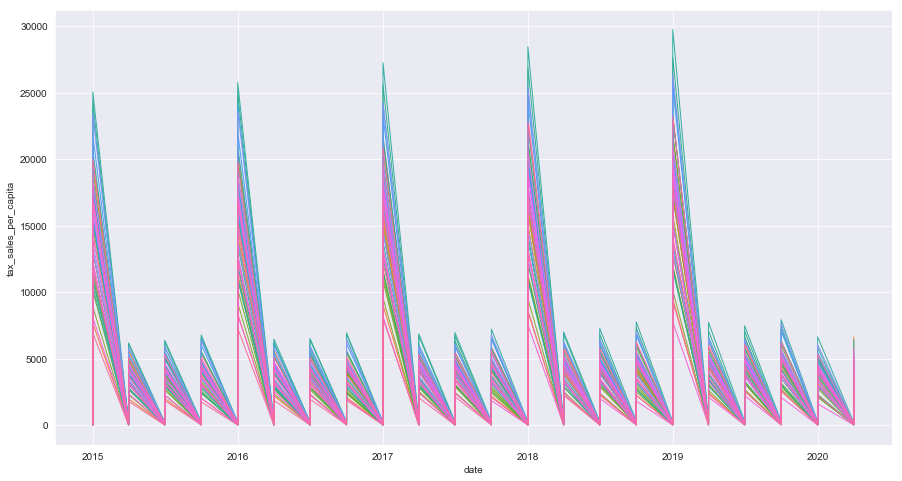

In [64]:
plt.figure(figsize = (15,8))

g = sns.lineplot(
    data = fv_year_df,
    x = "date", y = "tax_sales_per_capita", hue = "county", units = "county",
    estimator = None, lw = 1,
)

g.legend_.remove()

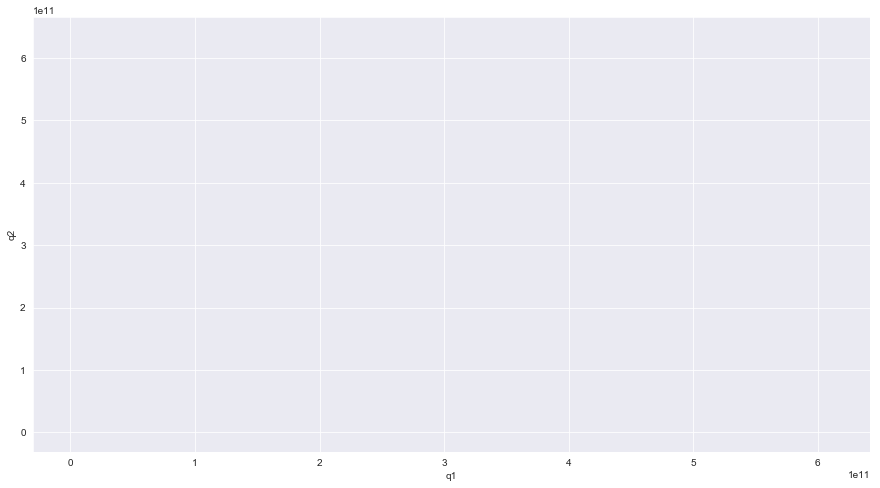

In [113]:
# plot 5 plots for each year showing q1 to q2 tax sales per capita